In [1]:
import pandas as pd
import numpy as np
from utils import *
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
GENERATE_WC = False

In [3]:
PATH1 = "../dados/brutos/tweets_marco_class/"
PATH2 = "../dados/brutos/tweets_abril_class/"
PATH3 = "../dados/brutos/tweets_maio_class/"
PATH4 = "../dados/brutos/tweets_junho_class/"

# Tweets de março

In [4]:
marco_df = get_tweets_from_folder(PATH1)
marco_df["date"] = pd.to_datetime(marco_df["date"])
tweets_marco_df = get_tweets_by_day(marco_df, True)

In [5]:
tweets_marco_df

,data,positivos,neutros,negativos,hashtags,total
0,2020-03-13,0.135952,0.360692,0.503357,"[#sobrevivencialismo, #preppers, #preparacao, ...",5958.0
1,2020-03-20,0.20157,0.401416,0.397014,"[#sextou, #bbb20, #cancelatudo, #quarentena, #...",84055.0
2,2020-03-27,0.186158,0.328647,0.485195,"[#twitter, #futurenostalgia, #quarentena, #ask...",48867.0


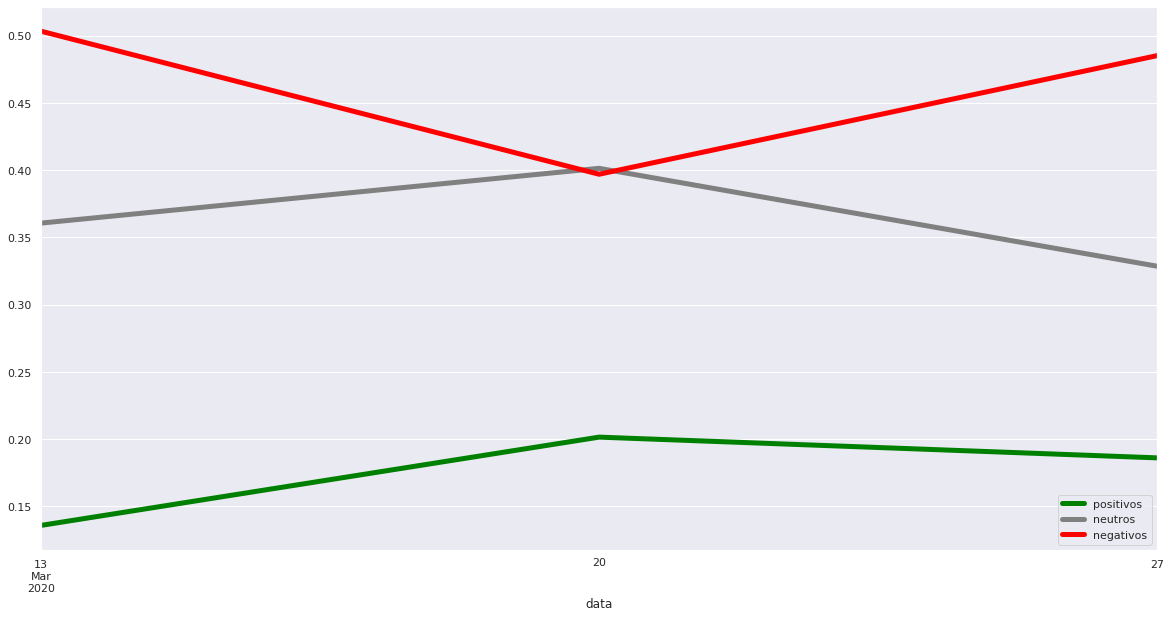

In [6]:
tweets_marco_df.set_index("data", inplace=True)
tweets_marco_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

# Análise de hashtags por dia de março

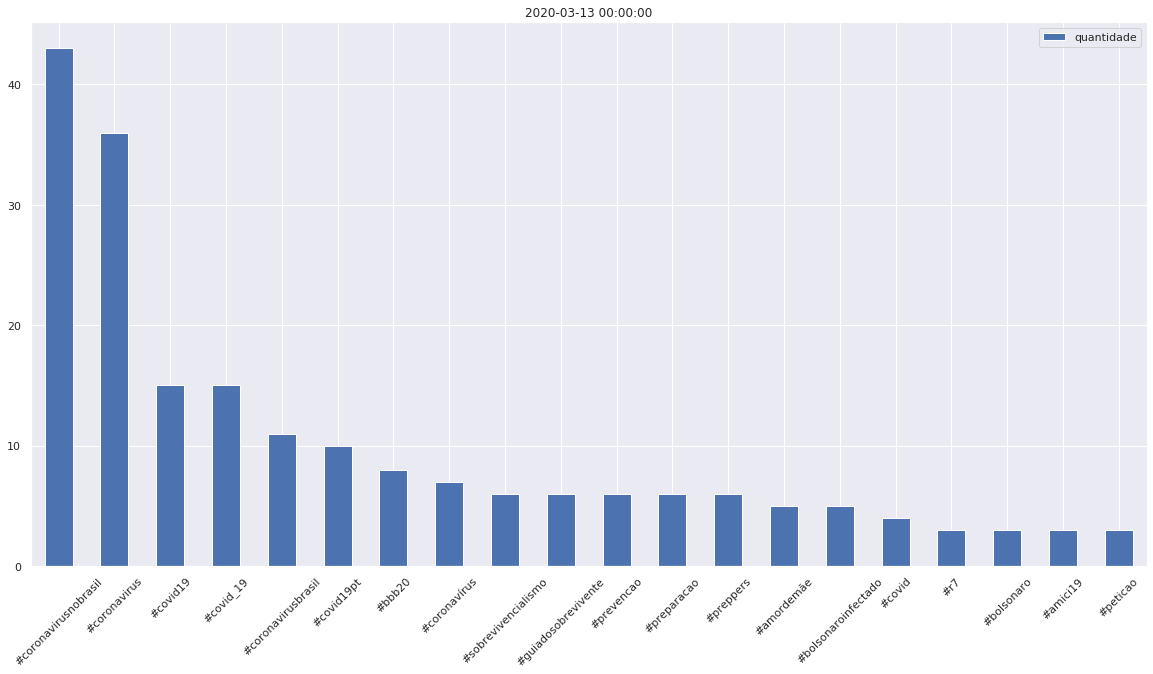

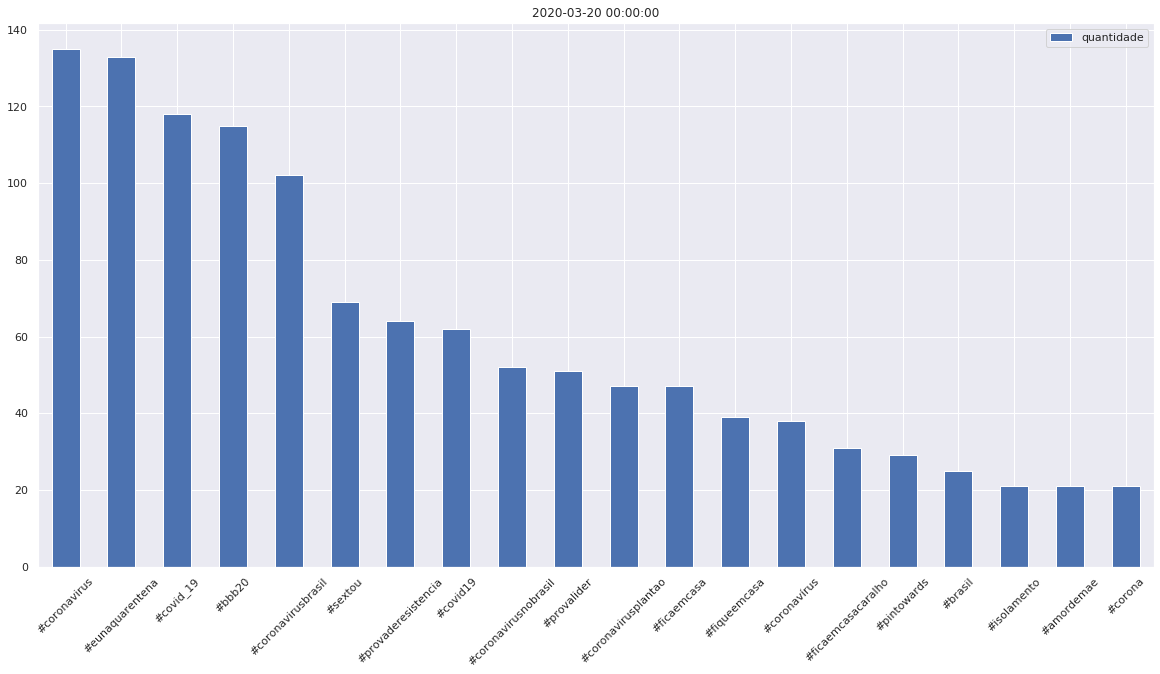

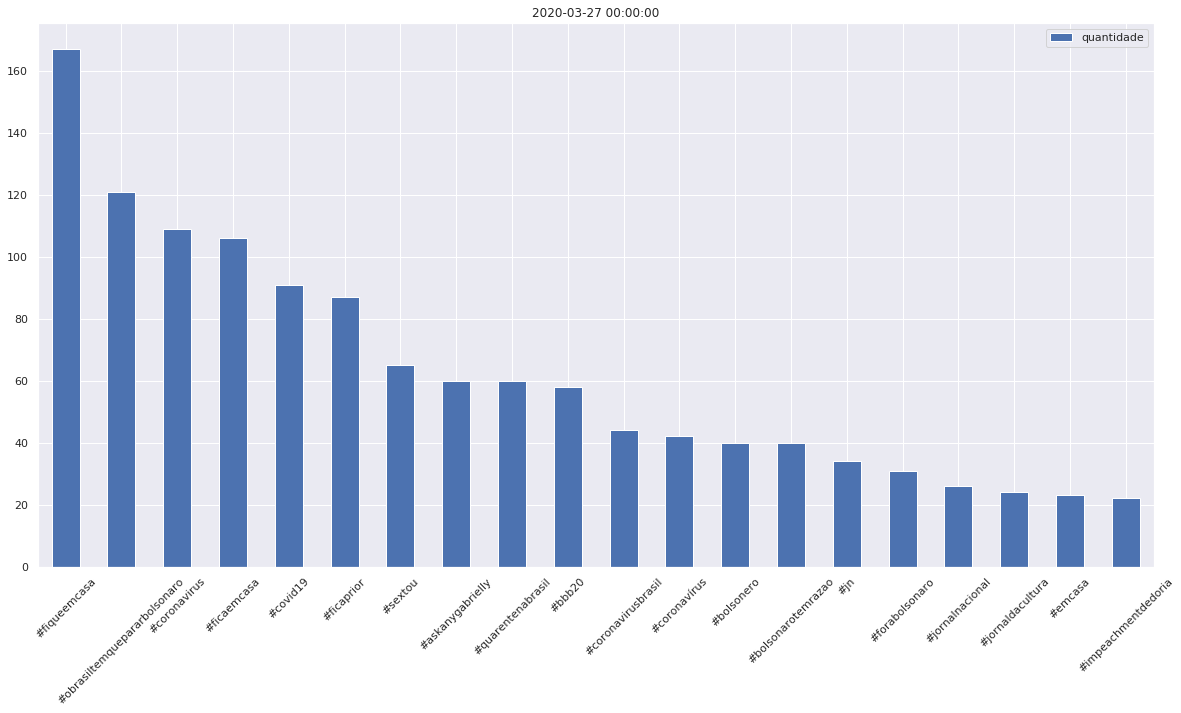

In [7]:
for day in tweets_marco_df.index:
    hashtags = tweets_marco_df.loc[day]["hashtags"]
    hashtags_df = contabilize_hashtags(hashtags)
    hashtags_df.head(20).plot.bar(rot=45, title=str(day))


# Tweets de Abril

In [8]:
abril_df = get_tweets_from_folder(PATH2)
abril_df["date"] = pd.to_datetime(abril_df["date"])

In [9]:
tweets_abril_df = get_tweets_by_day(abril_df, True)
tweets_abril_df

,data,positivos,neutros,negativos,hashtags,total
0,2020-04-17,0.206634,0.300391,0.492976,"[#thewire, #workshowlive, #foramaia, #foradori...",26622.0
1,2020-04-10,0.200878,0.301567,0.497555,"[#origami, #arteempapel, #paperart, #ficaemcas...",28017.0
2,2020-04-03,0.196989,0.31205,0.490961,"[#ravedogbremcasa, #finaestampa, #sextou, #bra...",29428.0
3,2020-04-24,0.211803,0.303525,0.484672,"[#momentos, #livedalud, #follotrick, #bbb20, #...",12200.0


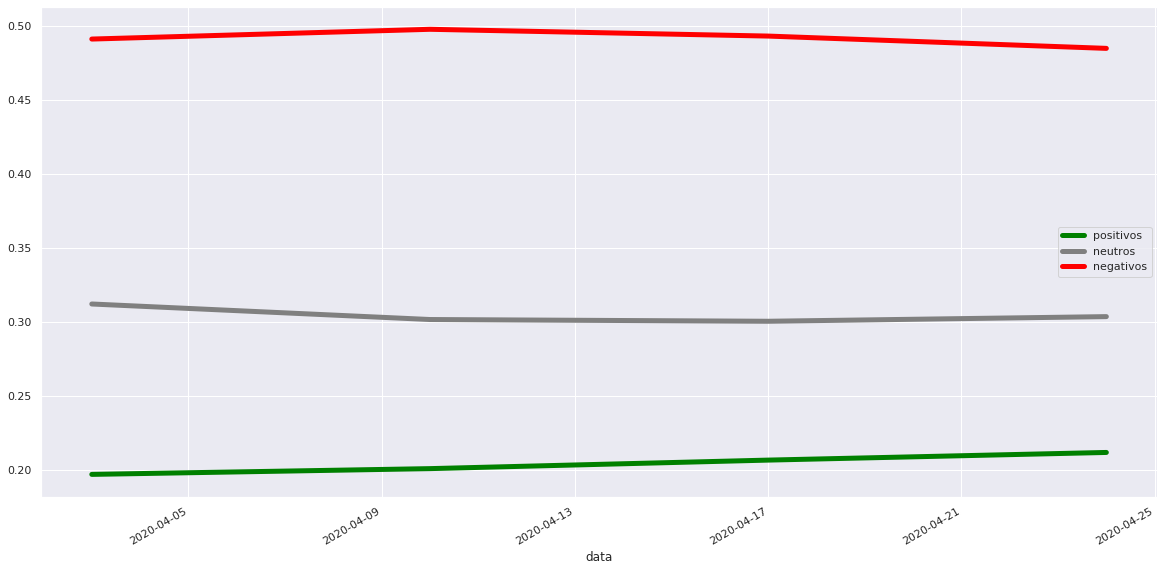

In [10]:
tweets_abril_df.set_index("data", inplace=True)
tweets_abril_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

# Hashtags em abril

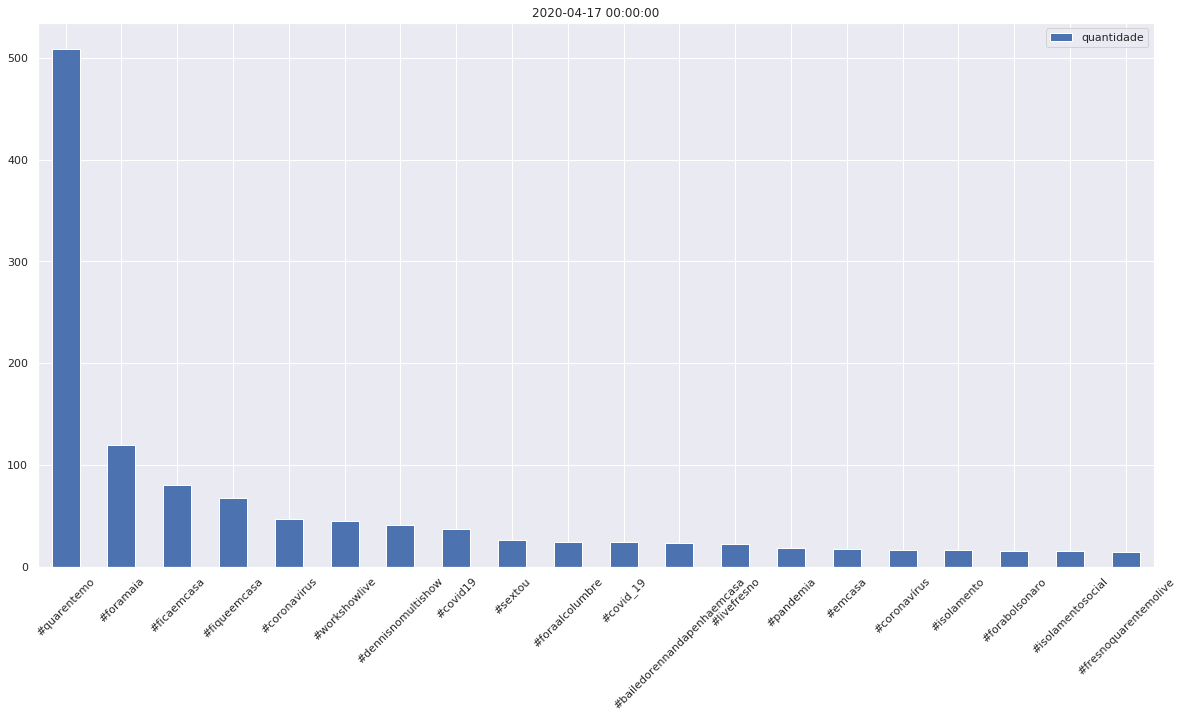

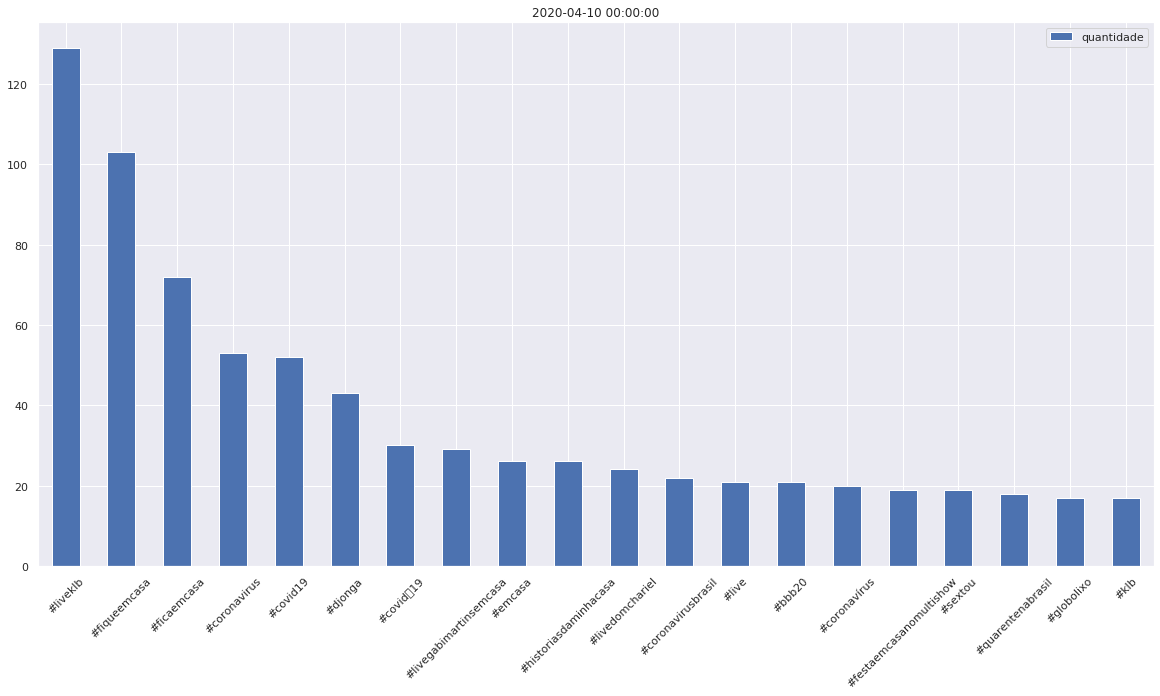

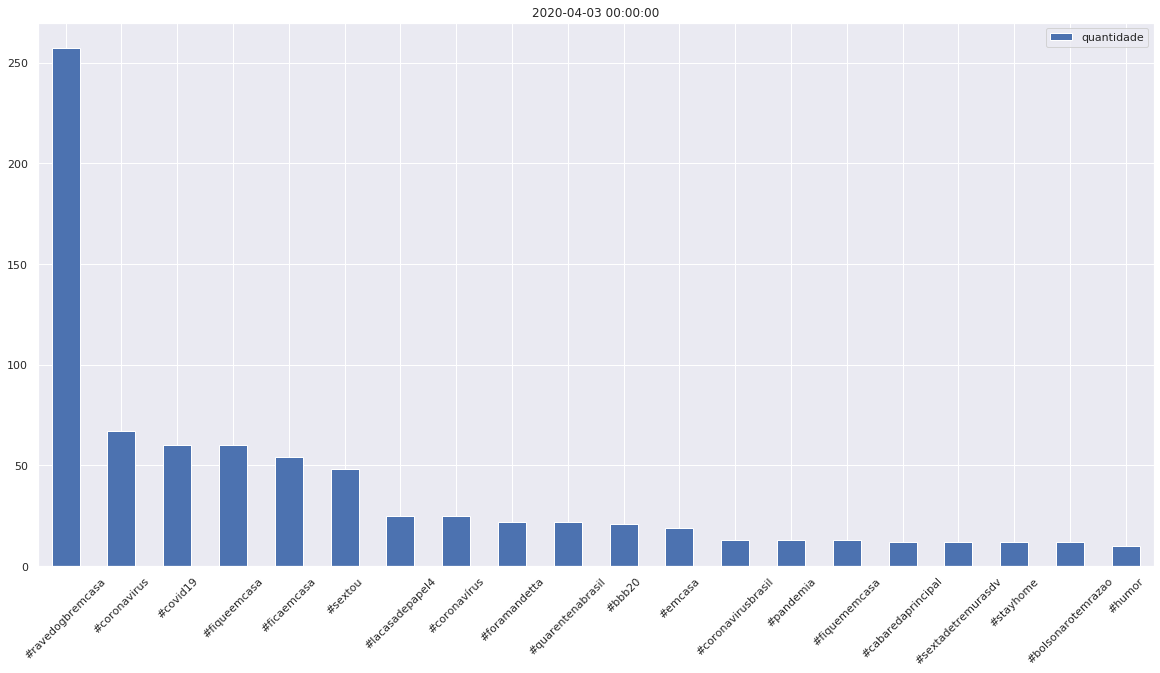

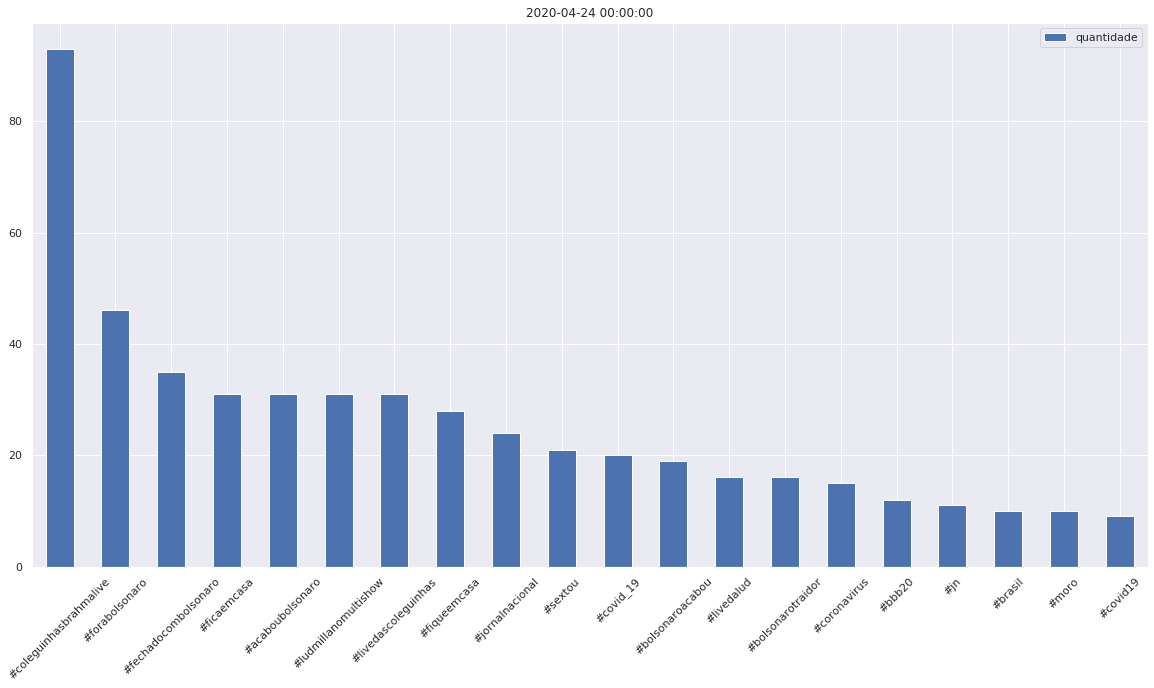

In [11]:
for day in tweets_abril_df.index:
    hashtags = tweets_abril_df.loc[day]["hashtags"]
    hashtags_df = contabilize_hashtags(hashtags)
    hashtags_df.head(20).plot.bar(rot=45, title=str(day))

# Tweets de maio

In [12]:
maio_df = get_tweets_from_folder(PATH3)
maio_df["date"] = pd.to_datetime(maio_df["date"])

In [13]:
tweets_maio_df = get_tweets_by_day(maio_df, True)
tweets_maio_df

,data,positivos,neutros,negativos,hashtags,total
0,2020-05-15,0.223662,0.304678,0.47166,"[#forabolsonaro, #liveorochi, #liveorochi, #li...",22230.0
1,2020-05-22,0.204456,0.281757,0.513788,"[#jn, #amstelemcasa, #livedapabllo, #liveembai...",15666.0
2,2020-05-29,0.204354,0.308098,0.487548,"[#sextadetremurasdv, #livepineapple, #coronaví...",13090.0
3,2020-05-01,0.195792,0.281866,0.522342,"[#livedoencontro, #wearewithyousprouse, #weare...",21865.0
4,2020-05-08,0.209013,0.290537,0.50045,"[#reagesp, #direitacombolsonaro, #liveluisa, #...",25563.0


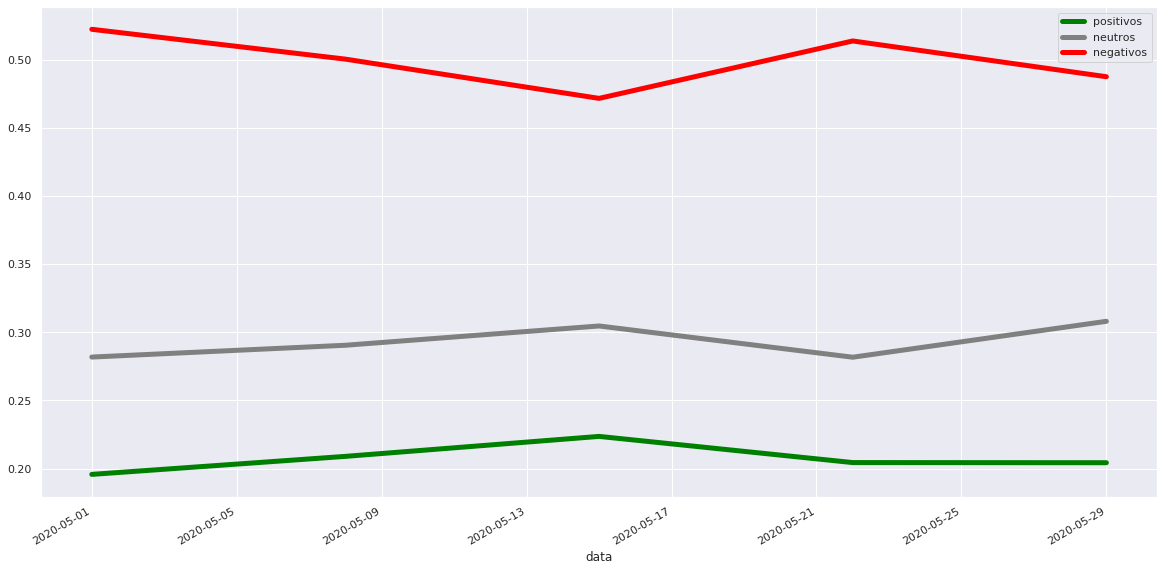

In [14]:
tweets_maio_df.set_index("data", inplace=True)
tweets_maio_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

# Hashtags em maio

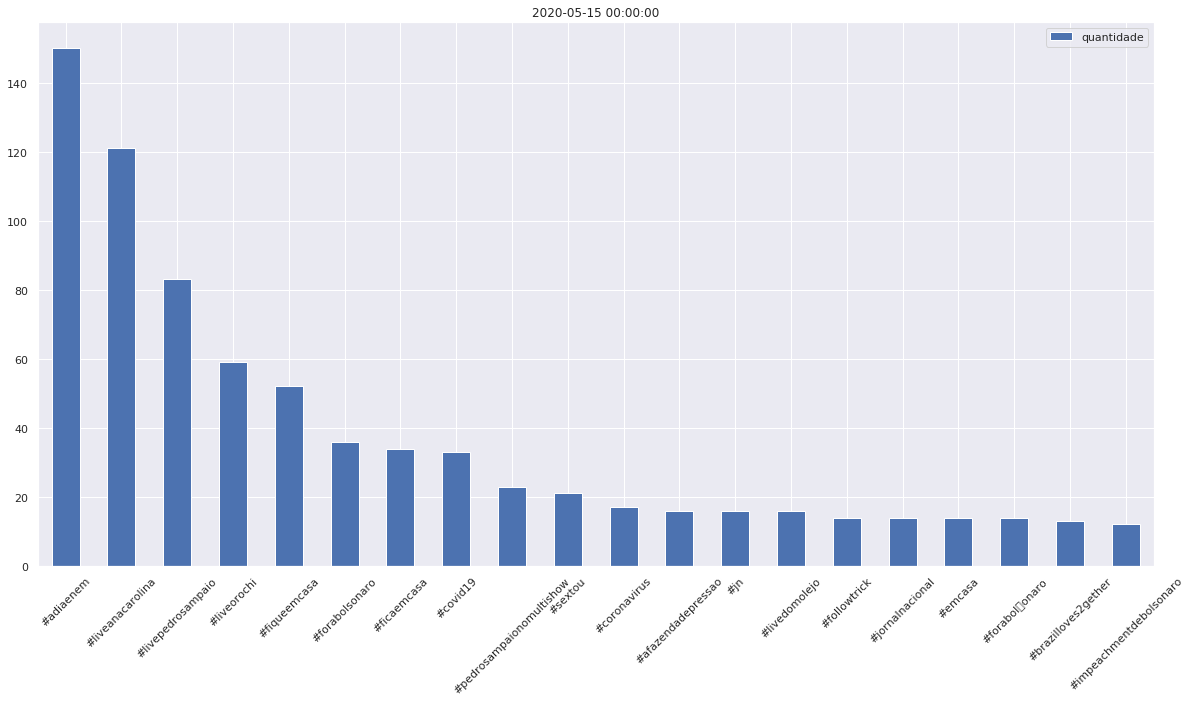

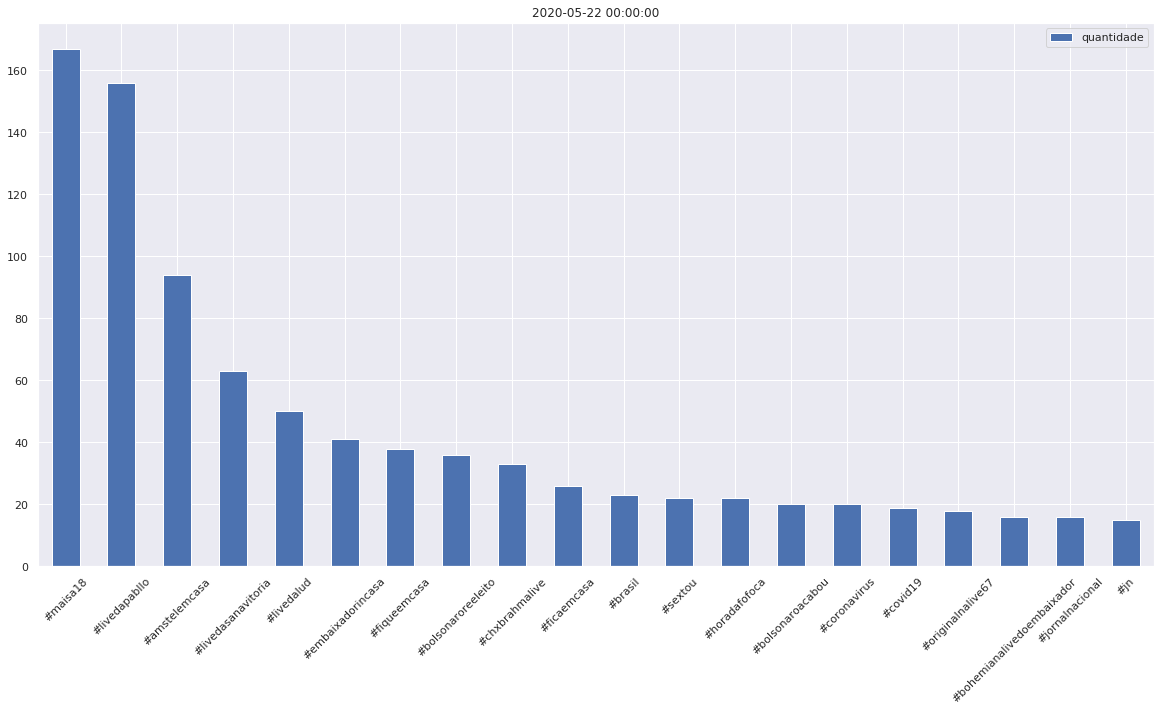

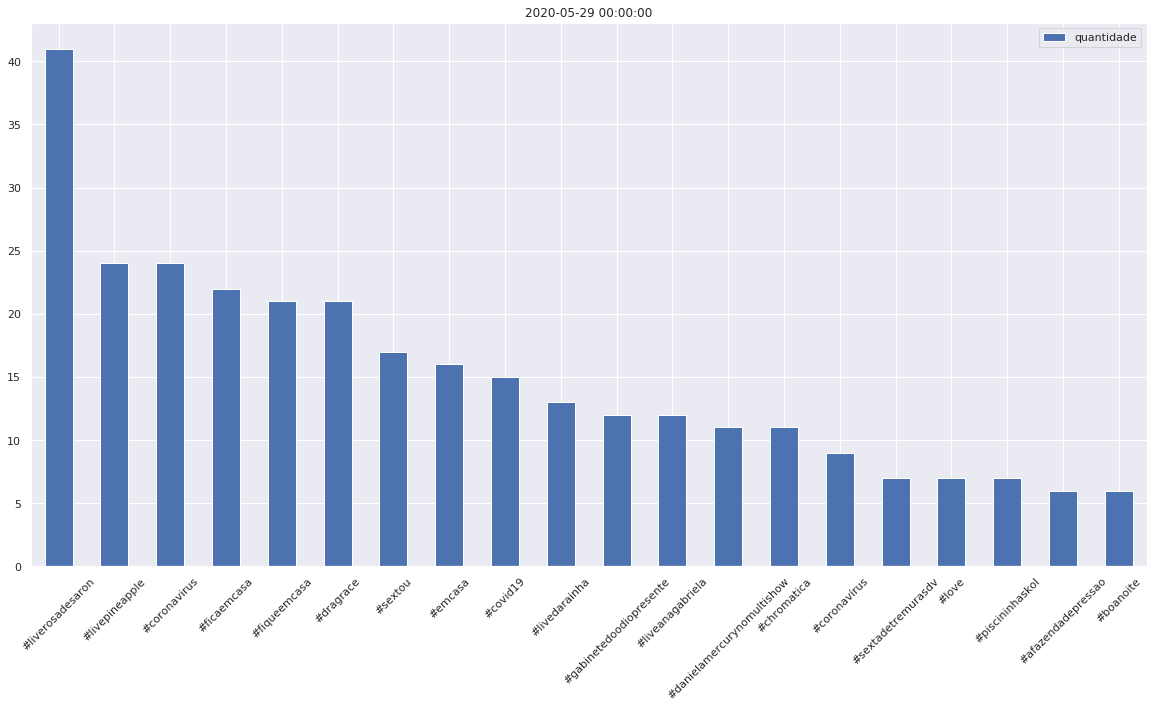

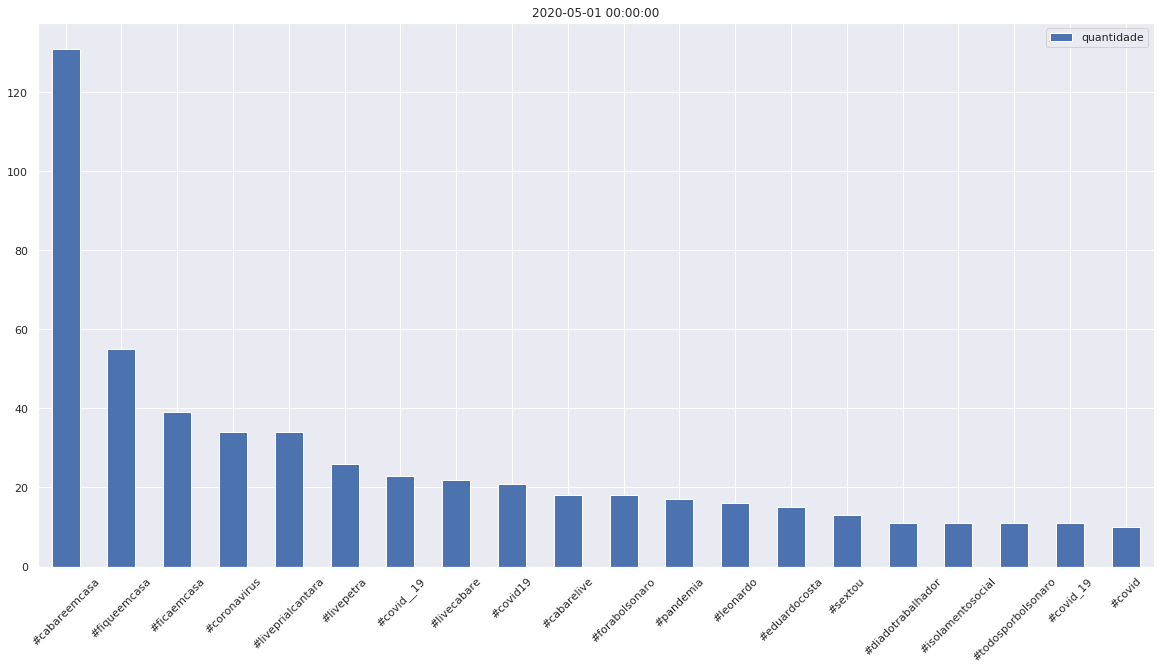

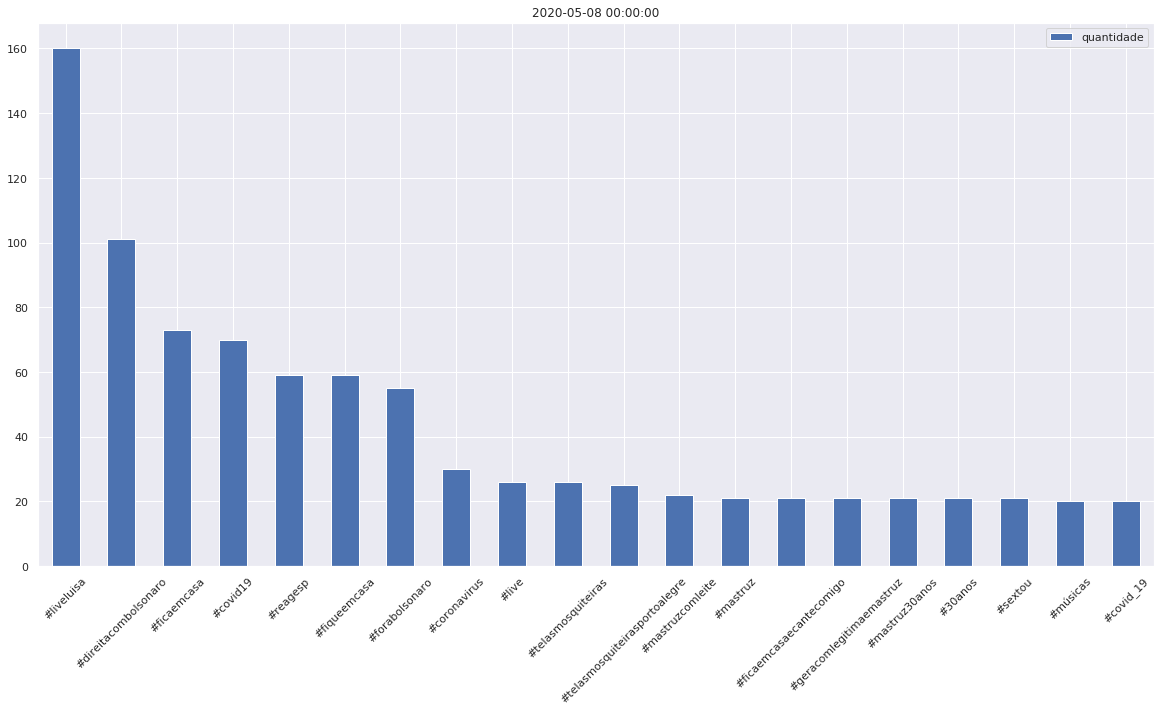

In [15]:
for day in tweets_maio_df.index:
    hashtags = tweets_maio_df.loc[day]["hashtags"]
    hashtags_df = contabilize_hashtags(hashtags)
    hashtags_df.head(20).plot.bar(rot=45, title=str(day))

# Tweets de junho

In [16]:
junho_df = get_tweets_from_folder(PATH4)
junho_df["date"] = pd.to_datetime(junho_df["date"])

In [17]:
tweets_junho_df = get_tweets_by_day(junho_df, True)
tweets_junho_df

,data,positivos,neutros,negativos,hashtags,total
0,2020-06-20,0.179611,0.264669,0.55572,"[#btsinmaracana2021, #housemusic, #deephouse, ...",12850.0
1,2020-06-13,0.162192,0.252393,0.585415,"[#super_ligados, #ep_quarentena, #mungonews, #...",12849.0
2,2020-06-06,0.205081,0.283665,0.511254,"[#forabol卐onaro, #bolsonarotransparenciazero, ...",15194.0
3,2020-06-27,0.220033,0.297785,0.482182,"[#arraiáemcasa, #quarentenalgbtq, #quarentena,...",11421.0


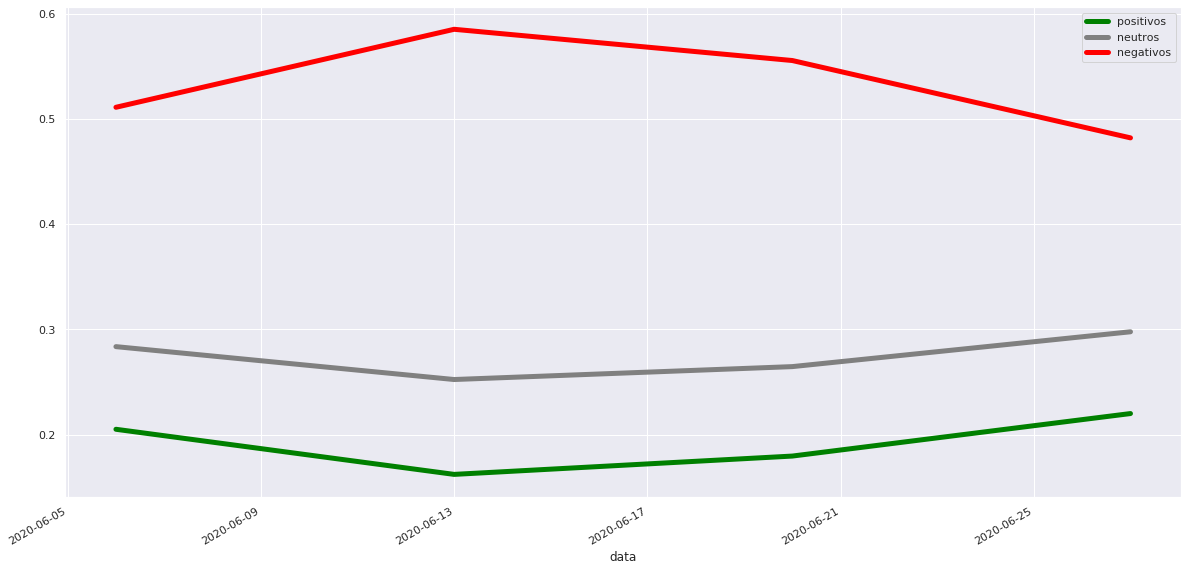

In [18]:
tweets_junho_df.set_index("data", inplace=True)
tweets_junho_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

# Hashtags de junho

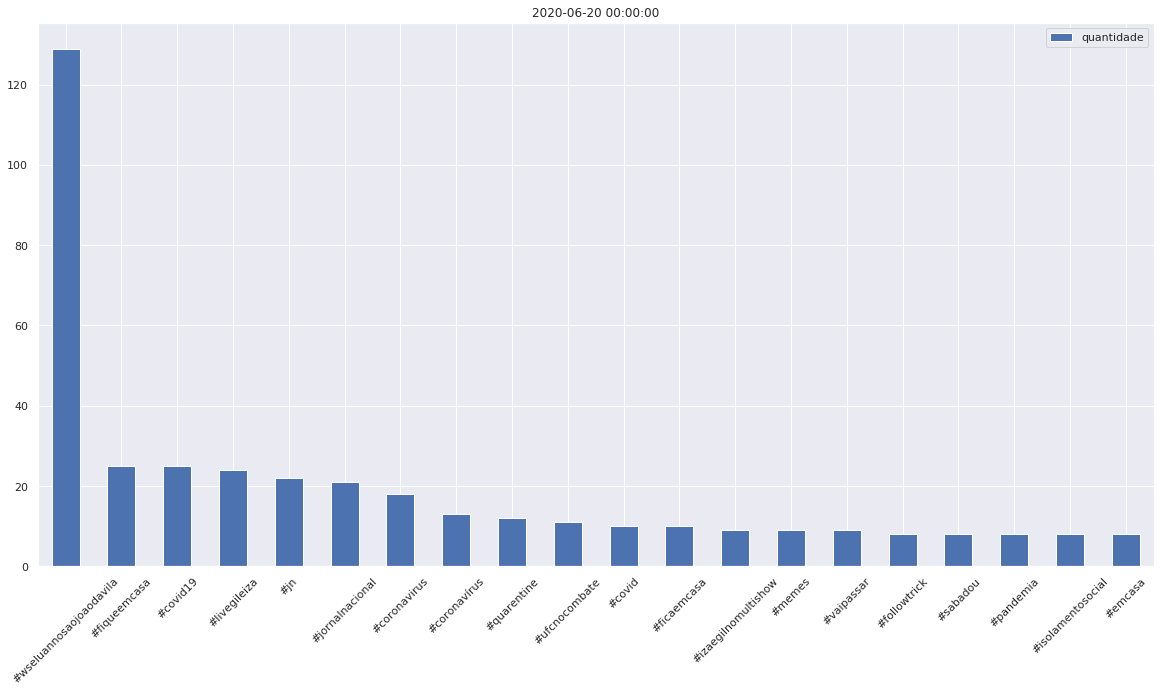

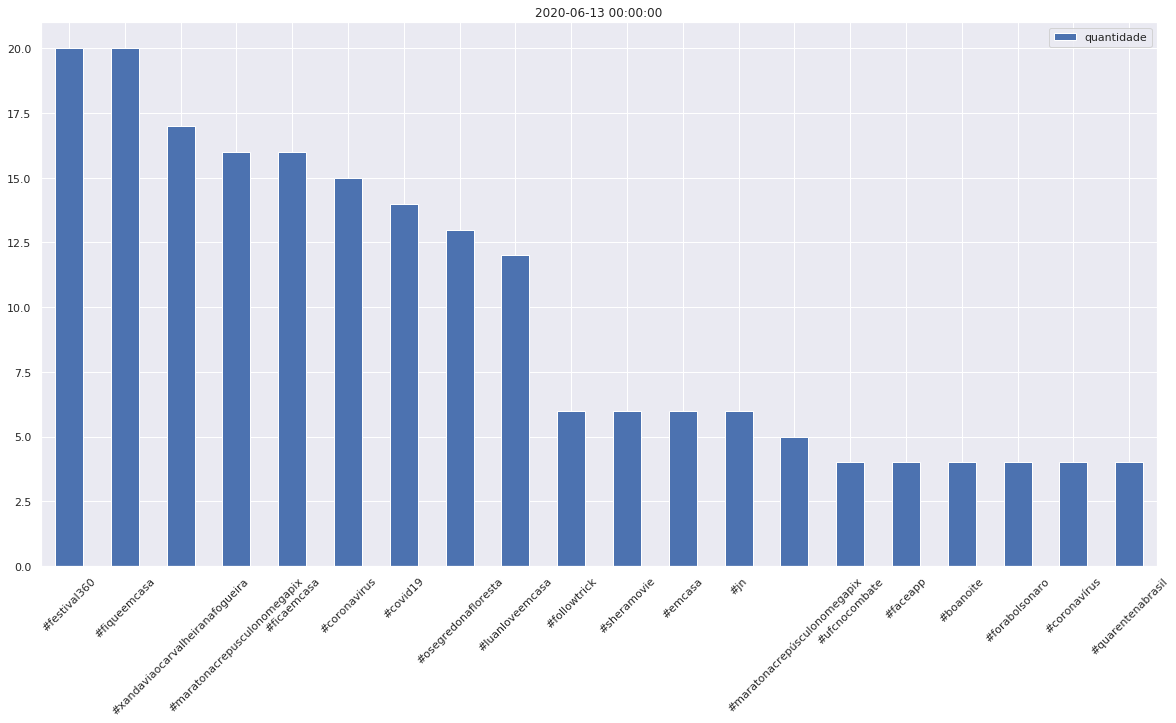

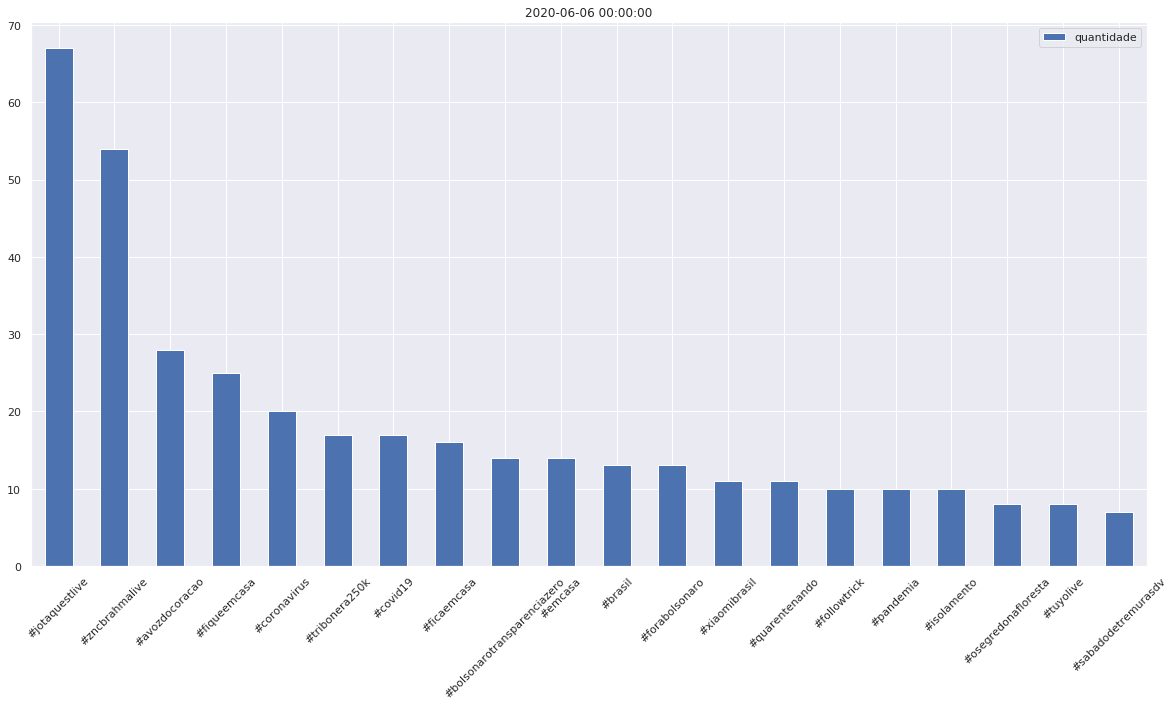

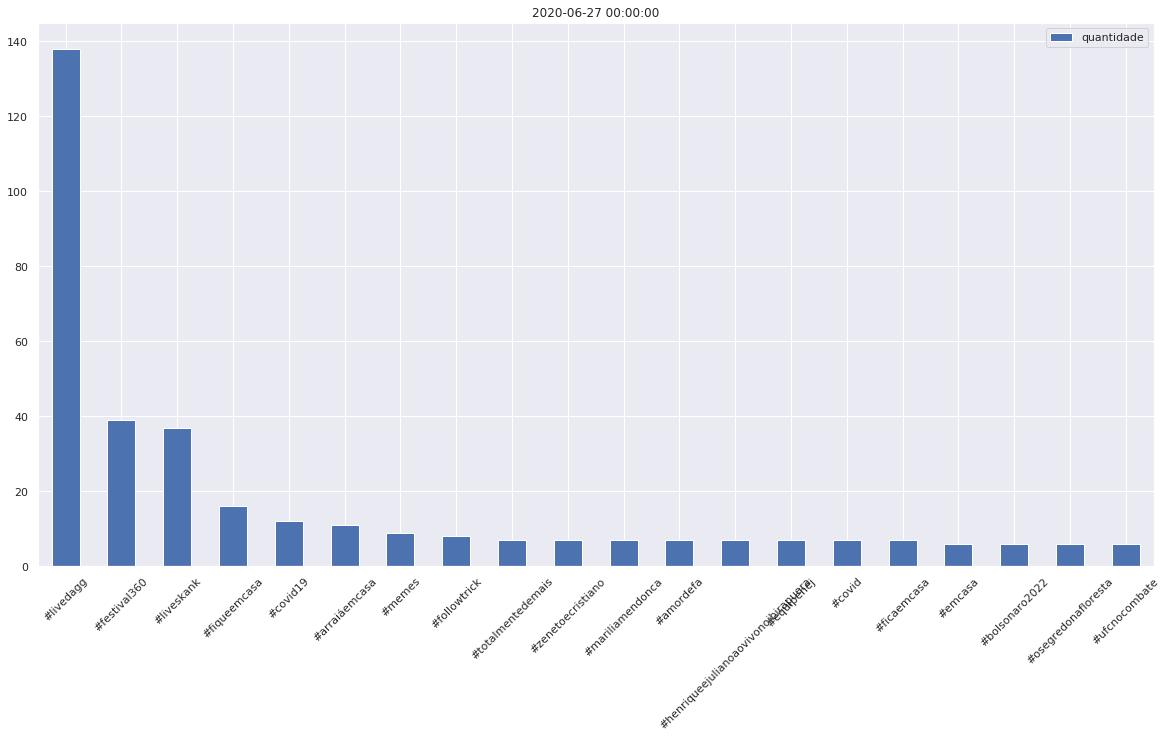

In [19]:
for day in tweets_junho_df.index:
    hashtags = tweets_junho_df.loc[day]["hashtags"]
    hashtags_df = contabilize_hashtags(hashtags)
    hashtags_df.head(20).plot.bar(rot=45, title=str(day))

# Construindo uma série temporal

In [20]:
tweets_df = tweets_marco_df.append(tweets_abril_df).append(tweets_maio_df).append(tweets_junho_df)
tweets_df.sort_index(inplace=True)

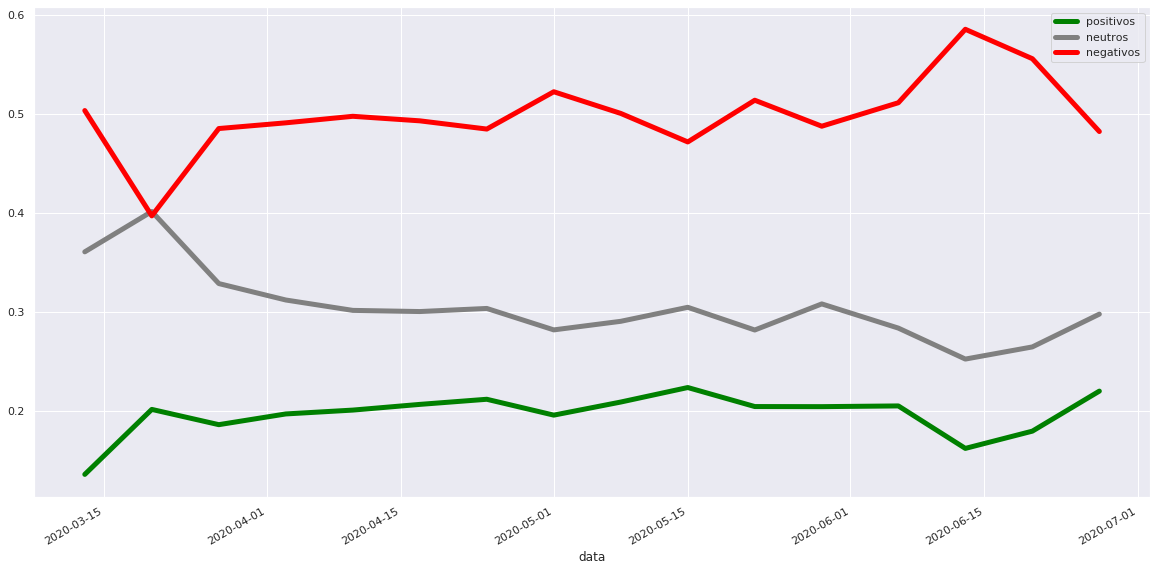

In [21]:
tweets_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

In [22]:
tweets_df.tail()

,positivos,neutros,negativos,hashtags,total
data,,,,,
2020-05-29,0.204354,0.308098,0.487548,"[#sextadetremurasdv, #livepineapple, #coronaví...",13090.0
2020-06-06,0.205081,0.283665,0.511254,"[#forabol卐onaro, #bolsonarotransparenciazero, ...",15194.0
2020-06-13,0.162192,0.252393,0.585415,"[#super_ligados, #ep_quarentena, #mungonews, #...",12849.0
2020-06-20,0.179611,0.264669,0.55572,"[#btsinmaracana2021, #housemusic, #deephouse, ...",12850.0
2020-06-27,0.220033,0.297785,0.482182,"[#arraiáemcasa, #quarentenalgbtq, #quarentena,...",11421.0


In [23]:
tweets_df.drop("hashtags", axis=1).to_excel("../dados/processados/serie_tweets.xlsx")

# Gerando Word Clouds

In [24]:
months = [(marco_df, tweets_marco_df), (abril_df, tweets_abril_df), (maio_df, tweets_maio_df)]

In [25]:
if GENERATE_WC:
    for month_df, month_tweets in months:
        for day in month_tweets.index:
            day_df = month_df[month_df["date"] == day]
            build_wordcloud(day_df["tweet"].values.tolist(), output_file=str(day)+".png", save_file=True)